# Real Estate - NYC  Neighbourhood Mean Rental Value Prediction

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
train_df = pd.read_csv('neighbourhood_data.csv')
districts = pd.read_csv('districts_data_cleaned.csv')
names = list(districts['name'].unique())
train_df = train_df[train_df['neighbourhood'].isin(names)]
counts = train_df['neighbourhood'].value_counts()
count_list = counts[counts > 50].index.tolist()
train_df = train_df[train_df['neighbourhood'].isin(count_list)]


train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]
train_df = train_df.astype({'bathrooms': 'int64'})
train_df = train_df.astype({'bedrooms': 'int64'})
train_df = train_df.astype({'interest_level': 'category'})
train_df = train_df.astype({'num_photos': 'int64'})
train_df = train_df.astype({'num_features': 'int64'})
train_df = train_df.astype({'num_description_words': 'int64'})
train_df = train_df.astype({'created_month': 'category'})
train_df = train_df.astype({'created_day': 'category'})
train_df = train_df.astype({'neighbourhood': 'str'})
train_df = train_df.astype({'price': 'float64'})
non_standardized = train_df.copy()
# train_df['price'] = train_df['price'].clip(upper = np.percentile(train_df['price'].values, 99))
train_df['price'] = (train_df['price'] - train_df['price'].mean()) / train_df['price'].std()
train_df.head()

,bathrooms,bedrooms,interest_level,num_photos,num_features,num_description_words,created_month,created_day,neighbourhood,price
0,1,1,medium,12,7,77,6,16,South Side,-0.065951
1,1,3,medium,5,0,95,6,24,East Williamsburg,-0.039170
2,3,3,low,11,2,205,6,28,Brooklyn Heights,0.132672
4,1,3,high,9,1,60,6,4,Sunset Park,-0.074878
6,2,3,low,8,8,183,6,24,Crown Heights,-0.036939


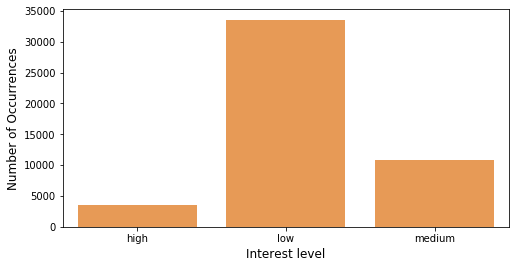

In [3]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

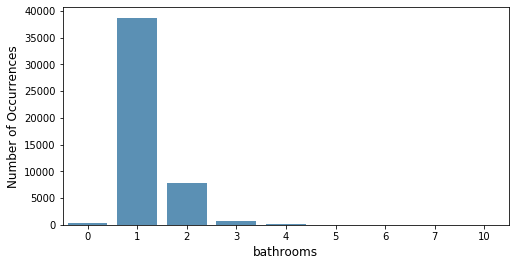

In [4]:
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

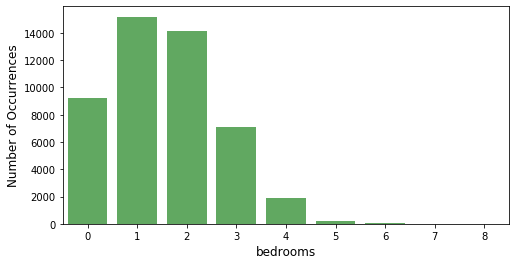

In [5]:
cnt_srs = train_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

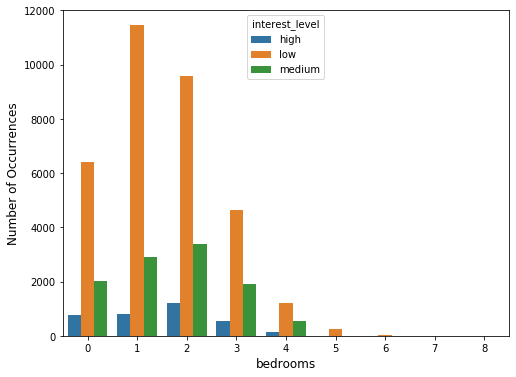

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

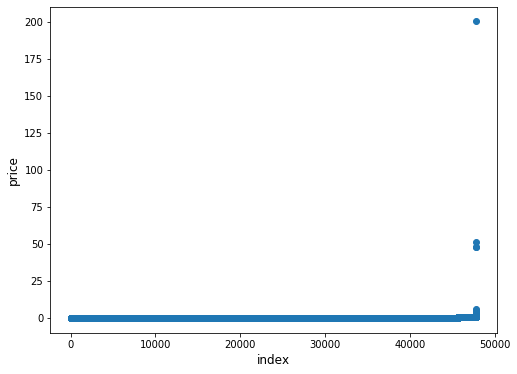

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


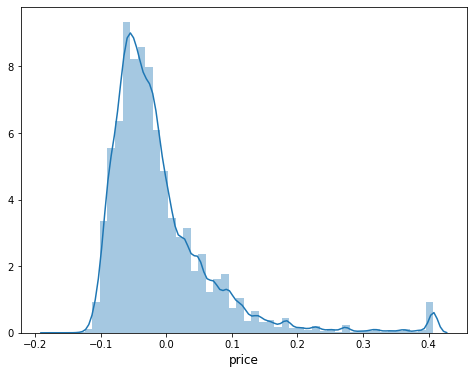

In [8]:
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].ix[train_df['price']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [9]:
# train_df[['price', 'boro_cd']].groupby(['boro_cd']).mean()

In [10]:
# train_df[['price', 'boro_cd']].groupby(['boro_cd']).std()

In [11]:
grouped = train_df[['price', 'neighbourhood']].groupby('neighbourhood', group_keys=False).apply(pd.DataFrame.sample, 5, replace = True)
print(grouped.groupby(['neighbourhood']).mean())
grouped.groupby(['neighbourhood']).std()

                              price
neighbourhood                      
Astoria                   -0.055685
Battery Park City          0.061793
Bay Ridge                 -0.023700
Bedford Stuyvesant        -0.061086
Boerum Hill               -0.027788
Brooklyn Heights          -0.033457
Bushwick                  -0.063808
Carnegie Hill              0.041618
Carroll Gardens           -0.006444
Central Harlem            -0.080091
Chelsea                    0.012695
Chinatown                 -0.002838
Civic Center              -0.010426
Clinton                   -0.012756
Clinton Hill              -0.057060
Cobble Hill               -0.007480
Crown Heights             -0.050150
Downtown                  -0.067647
Dumbo                      0.017248
East Harlem               -0.084920
East Village              -0.006230
East Williamsburg         -0.041447
Financial District        -0.014371
Flatbush                  -0.076440
Flatiron                   0.095134
Forest Hills              -0

,price
neighbourhood,
Astoria,0.014600
Battery Park City,0.177104
Bay Ridge,0.126393
Bedford Stuyvesant,0.019572
Boerum Hill,0.039090
Brooklyn Heights,0.025763
Bushwick,0.027068
Carnegie Hill,0.159692
Carroll Gardens,0.049497


In [12]:
import scikits.bootstrap as bootstrap 
df = train_df[['price', 'neighbourhood']]
X = df.groupby('neighbourhood').apply(lambda x:bootstrap.ci(x.values, np.mean))
X = X.values
X = np.array(list(X), dtype=np.float)

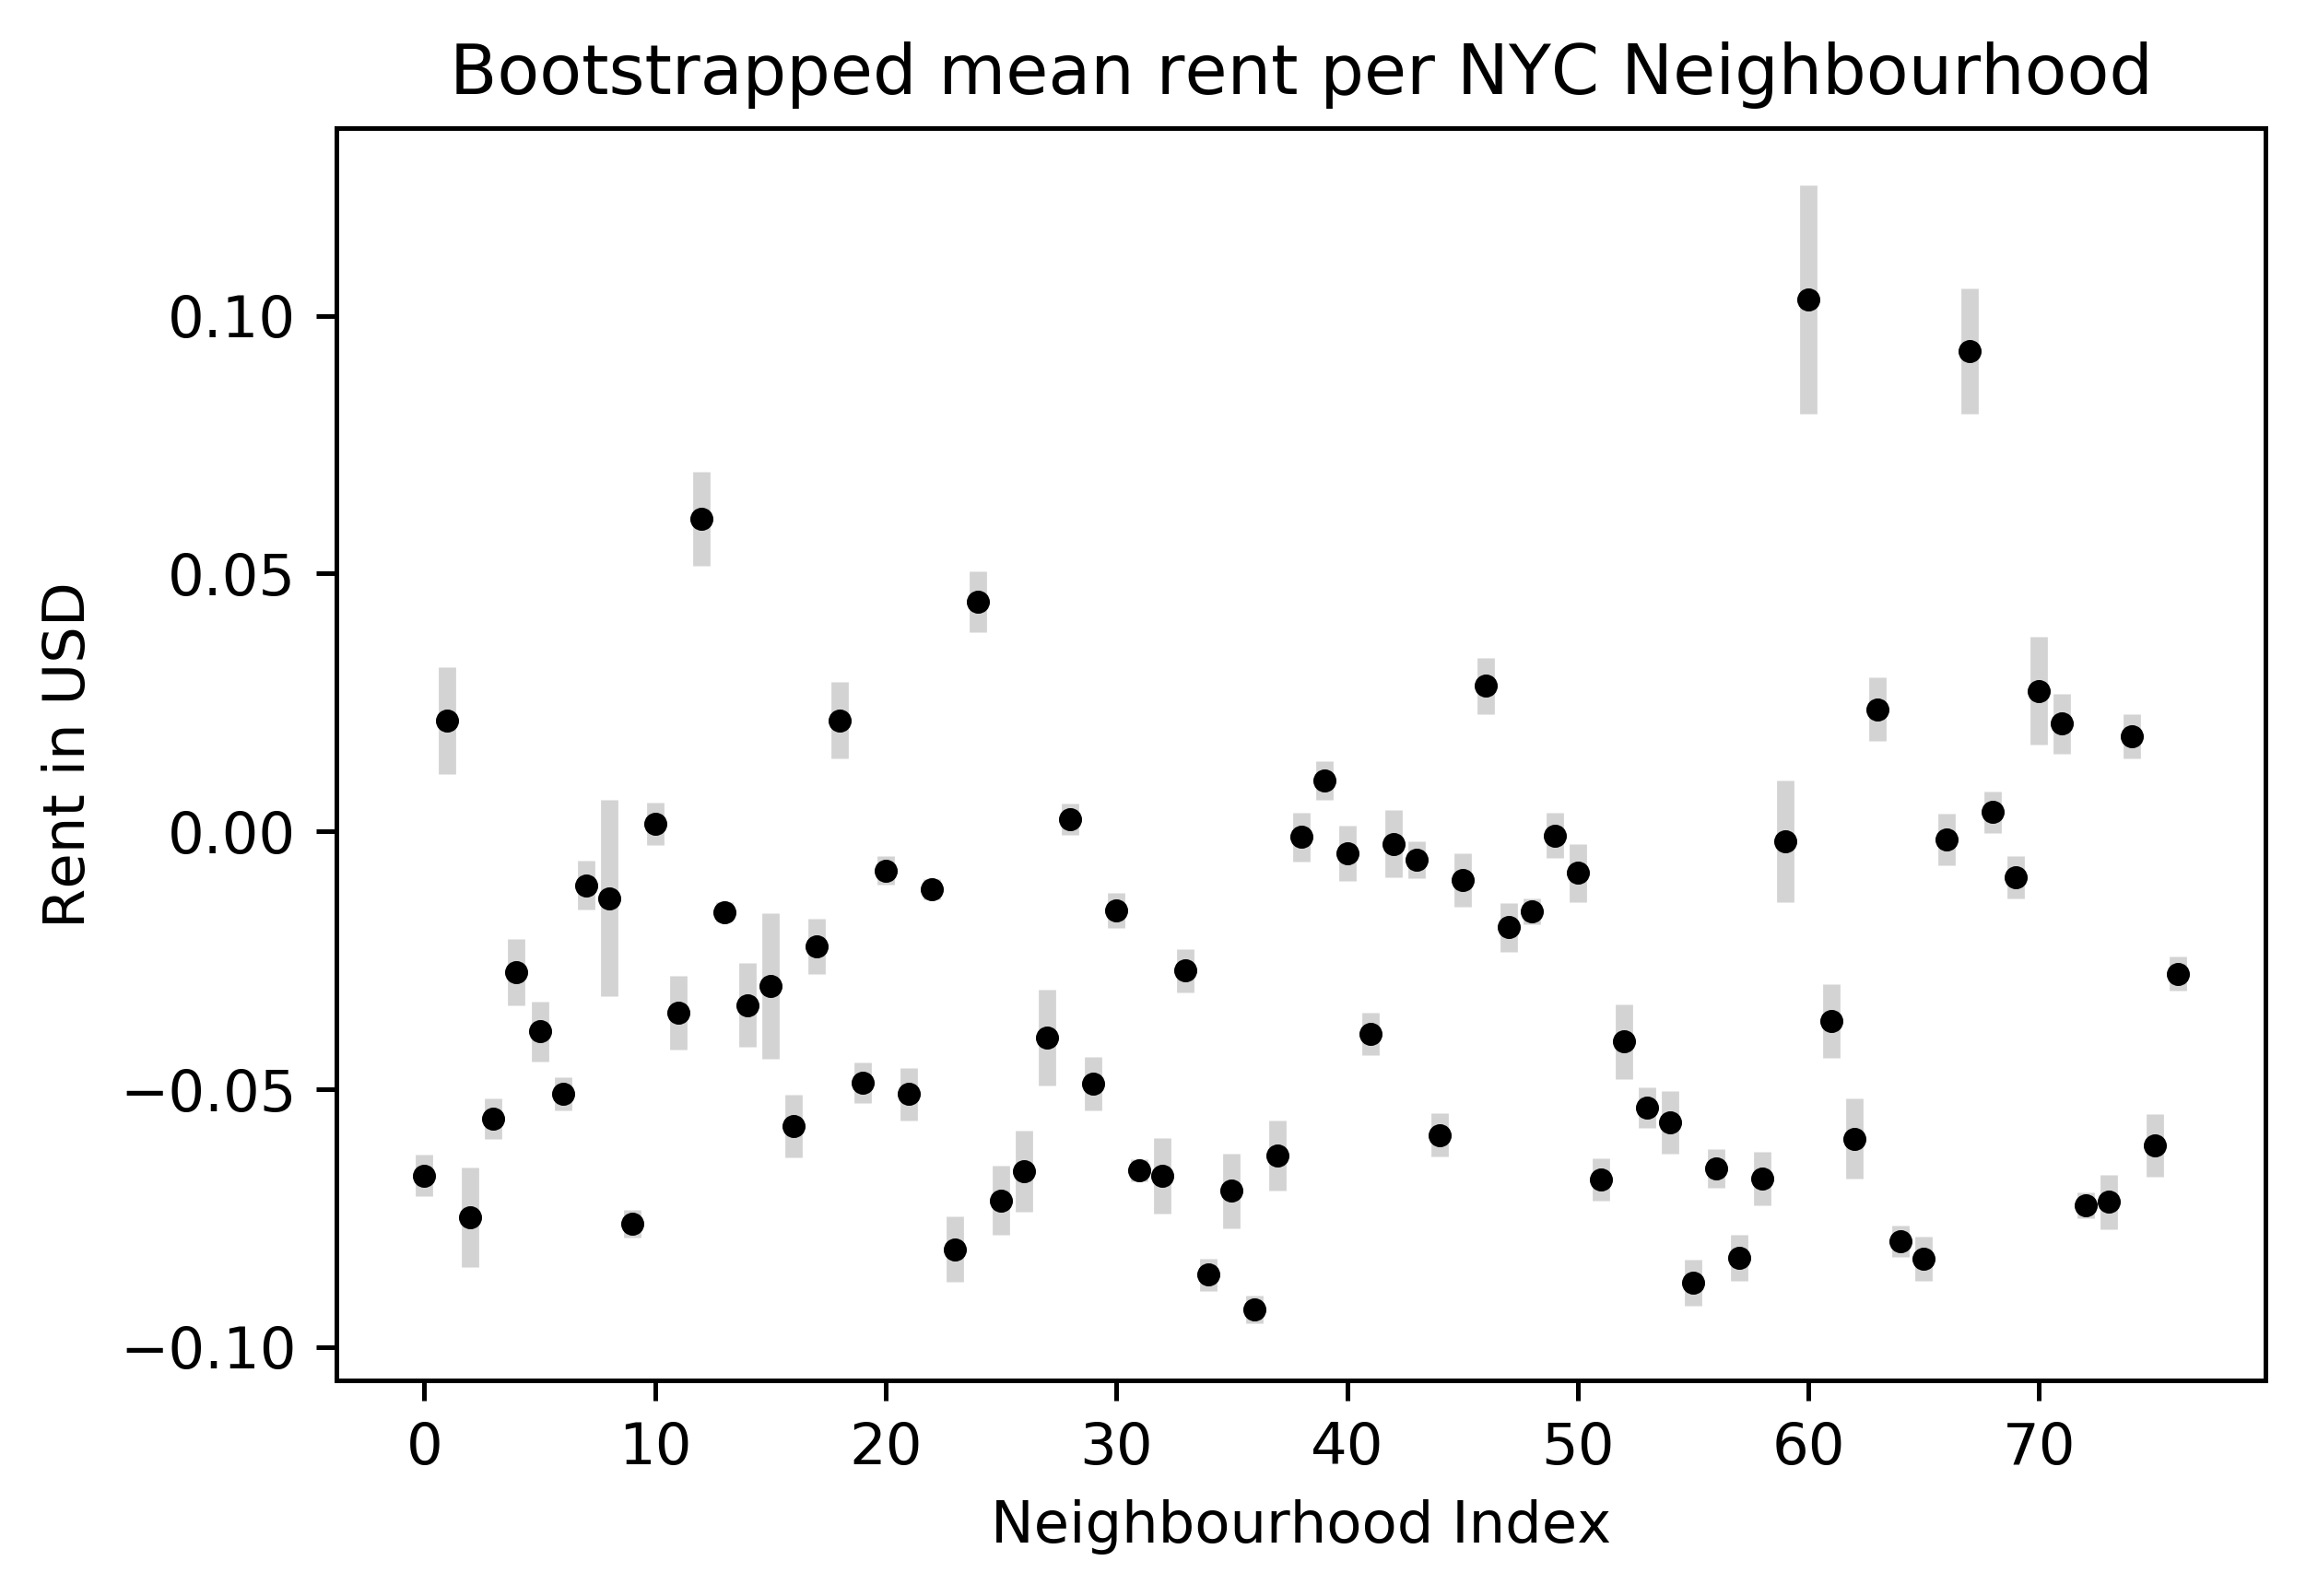

In [13]:
bootstraps = X # All districts

from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

mean = (bootstraps[:,0] + bootstraps[:,1]) / 2
p5 = bootstraps[:,0]
p95 = bootstraps[:,1]

plt.errorbar(
    x = range(bootstraps.shape[0]),
    y = mean,
    yerr=[mean - p5, p95 - mean],
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Bootstrapped mean rent per NYC Neighbourhood')
plt.ylabel('Rent in USD')
plt.xlabel('Neighbourhood Index')
# plt.xticks(range(bootstraps.shape[0]))
plt.show()

In [14]:
# plt.savefig('meanNoPark.png', dpi=450)
print(mean)

[-0.06673869  0.02146299 -0.07483839 -0.05572764 -0.02737008 -0.03877577
 -0.0508304  -0.01044175 -0.01296245 -0.07606009  0.00147207 -0.03512628
  0.06056666 -0.0156156  -0.03365566 -0.02992527 -0.05713017 -0.02229775
  0.02154109 -0.04880523 -0.00757935 -0.05096685 -0.01115793 -0.08106967
  0.04457633 -0.07154352 -0.06586715 -0.03993718  0.00230133 -0.04893595
 -0.01531444 -0.0657555  -0.06682561 -0.02697063 -0.08601048 -0.06973524
 -0.09279455 -0.06284777 -0.00111502  0.00979915 -0.004195   -0.0393225
 -0.00241936 -0.00548762 -0.0588659  -0.00942996  0.0281916  -0.01859917
 -0.01555613 -0.00081909 -0.00802712 -0.06748033 -0.04077924 -0.05359463
 -0.05643433 -0.08759034 -0.06540693 -0.08268984 -0.06730933 -0.00196866
  0.1031829  -0.03680026 -0.05961355  0.02369103 -0.07954808 -0.08288161
 -0.00149631  0.09309413  0.00375008 -0.00890997  0.02720541  0.02087172
 -0.07258173 -0.07183064  0.01843609 -0.06086887 -0.02759688]


In [15]:
list(train_df)

['bathrooms',
 'bedrooms',
 'interest_level',
 'num_photos',
 'num_features',
 'num_description_words',
 'created_month',
 'created_day',
 'neighbourhood',
 'price']

In [16]:
# df.groupby('b', group_keys=False).apply(pd.DataFrame.sample, frac=.3)
train_df['interest_level'] = pd.Categorical(train_df['interest_level'], categories=train_df['interest_level'].unique()).codes
train_df['neighbourhood'] = pd.Categorical(train_df['neighbourhood'], categories=train_df['neighbourhood'].unique()).codes
train_samples = train_df.groupby('neighbourhood').apply(pd.DataFrame.sample, n=20)

In [17]:
train_samples

bathrooms  bedrooms  interest_level  num_photos  \
neighbourhood                                                          
0             4347           1         3               1           5   
              4416           1         2               1           8   
              536            1         2               0           4   
              3942           1         2               1           6   
              1652           1         2               0          11   
              1205           1         3               0          15   
              3078           1         3               1           4   
              1501           1         2               1           8   
              2761           1         1               1           8   
              1828           1         1               1           4   
              2997           1         1               0           8   
              785            1         1               0           4   
              3427           1         1               1           9   
              158            1         3               0           7   
              3677           1         2               1          10   
              703            1         0               0           5   
              1921           1         2               0           3   
              1242           1         2               1           9   
              3334           1         3               1          10   
              309            1         2               0           6   
1             2417           1         2               2           4   
              1452           1         2               1           7   
              531            1         2               2          12   
              3734           2         4               0           4   
              4015           1         2               1           9   
              2496           2         2               1          10   
              1259           1         1               1           4   
              2310           2         1               1           0   
              2498           1         0               1           0   
              1806           1         2               0           6   
...                        ...       ...             ...         ...   
75            47100          1         1               1           0   
              47213          1         3               2           6   
              48625          1         1               0           6   
              46917          1         2               1           9   
              47215          2         3               2           6   
              48475          1         1               0           6   
              47461          1         2               2           4   
              47212          1         2               1           3   
              47947          1         1               1           6   
              46835          1         2               0           8   
76            48818          1         1               0           8   
              48163          1         2               0           5   
              48267          1         1               1           6   
              47803          1         1               1           5   
              47718          1         2               1           4   
              47413          1         2               1          12   
              47004          1         2               2           8   
              48566          1         1               2           5   
              47498          1         1               1           3   
              47422          1         0               2           3   
              48720          1         2               0           6   
              48789          1         1               1           1   
              47915          1         1               1     

In [18]:
train_samples.shape

(1540, 10)

In [19]:
def sampleSet(n = 25, size = 1000):
    train_samples = train_df.groupby('neighbourhood').apply(pd.DataFrame.sample, n, replace = True)
    train_samples = train_samples.astype({'price': 'float64'})
    features = []
    labels = []
    for i, hood in enumerate(train_samples['neighbourhood'].unique()):
        samples = []
        label = []
        get_boro = train_samples[train_samples['neighbourhood'] == hood]
        get_boro = get_boro['price']
        for j in range(size):
            sample = get_boro.sample(n, replace = True).to_numpy()
            samples.append(sample)
            label.append(np.mean(sample))
        features.append(samples)
        labels.append(label)
    return np.array(features), np.array(labels)

In [20]:
def train_Set(n = 25):
    train_samples = train_df.groupby('neighbourhood').apply(pd.DataFrame.sample, n, replace = False)
    train_samples = train_samples.astype({'price': 'float64'})
    features = []
    for i, hood in enumerate(train_samples['neighbourhood'].unique()):
        get_boro = train_samples[train_samples['neighbourhood'] == hood]
        sample = get_boro.to_numpy()
        features.append(sample)
    return np.array(features)

In [21]:
X_sets = train_Set()

In [22]:
X_sets.shape

(77, 25, 10)

In [23]:
X_sets[0,0]

array([1, 3, 0, 7, 7, 251, 4, 27, 0, -0.01654063687039112], dtype=object)

In [24]:
X, y = sampleSet()

In [25]:
X_train = X
y_train = y

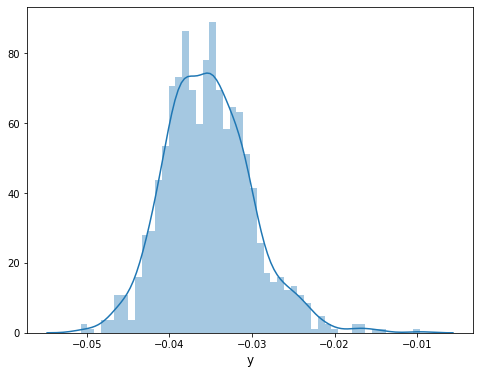

In [26]:
plt.figure(figsize=(8,6))
sns.distplot(y[0,:], bins=50, kde=True)
plt.xlabel('y', fontsize=12)
plt.show()

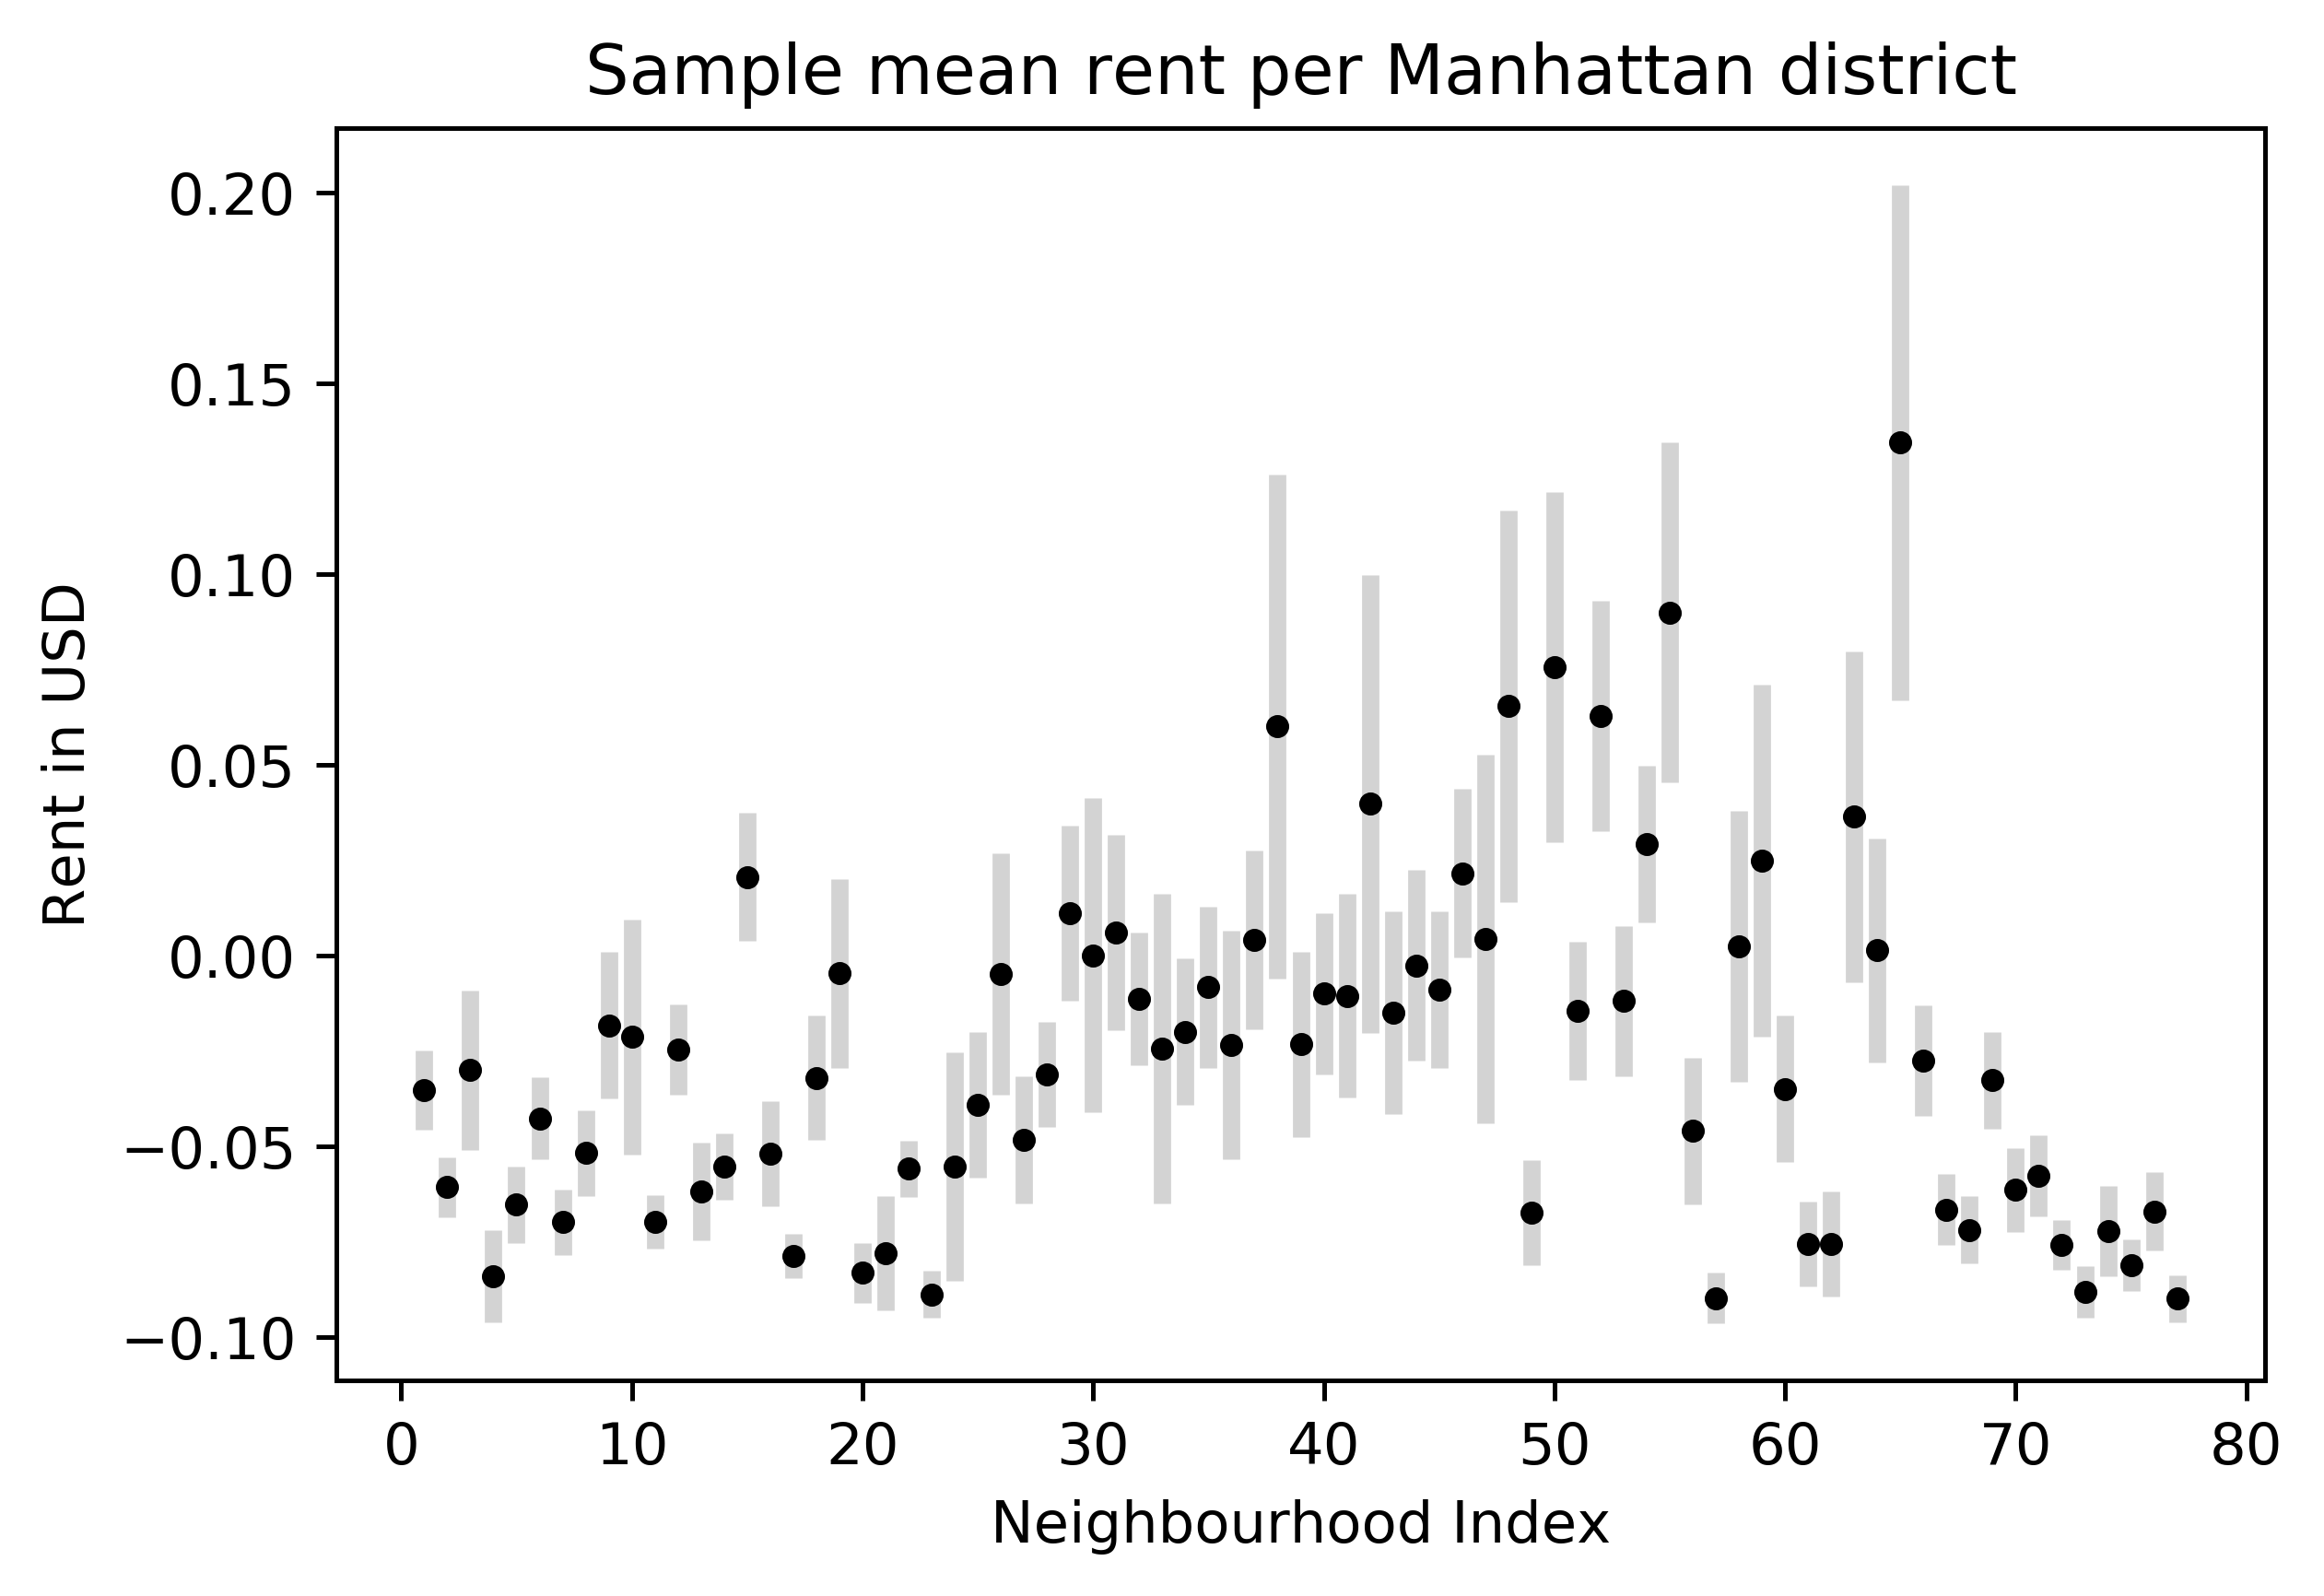

In [27]:
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

sample_mean = np.mean(y, axis = 1)
sample_error = np.std(y, axis = 1)

plt.errorbar(
    x = range(1, bootstraps.shape[0] + 1),
    y = sample_mean,
    yerr= 1.96 * sample_error,
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Sample mean rent per Manhattan district')
plt.ylabel('Rent in USD')
plt.xlabel('Neighbourhood Index')
# plt.xticks(range(bootstraps.shape[0]))
plt.show()

In [28]:
def bootstrap(size = 10000):
    train_samples = train_df.groupby('neighbourhood').apply(pd.DataFrame.sample, frac = 1, replace = True)
    train_samples = train_samples.astype({'price':'float64'})
    features = []
    labels = []
    for i, hood in enumerate(train_samples['neighbourhood'].unique()):
        samples = []
        label = []
        get_boro = train_samples[train_samples['neighbourhood'] == hood]
        get_boro = get_boro['price']
        for j in range(size):
            sample = get_boro.sample(frac = 1, replace = True).to_numpy()
            samples.append(sample)
            label.append(np.mean(sample))
        features.append(samples)
        labels.append(label)
    return np.array(features), np.array(labels)

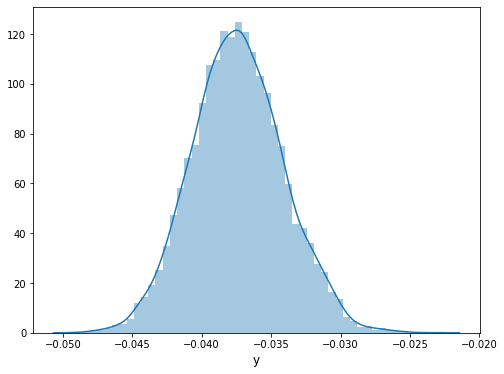

In [29]:
X, y = bootstrap()
plt.figure(figsize=(8,6))
sns.distplot(y[0,:], bins=50, kde=True)
plt.xlabel('y', fontsize=12)
plt.show()

In [30]:
np.std(y, axis = 1)

array([0.00329885, 0.00226619, 0.0035082 , 0.00240721, 0.0026969 ,
       0.00149581, 0.00289514, 0.0027821 , 0.00277001, 0.00391621,
       0.00219501, 0.0029253 , 0.00215936, 0.00187277, 0.00413652,
       0.00188608, 0.00319168, 0.00274263, 0.00273276, 0.00297904,
       0.00244383, 0.00257662, 0.00224748, 0.00415493, 0.0042908 ,
       0.00794959, 0.00706526, 0.00200681, 0.00206145, 0.00236921,
       0.00149757, 0.00131986, 0.00175293, 0.00100217, 0.00203012,
       0.00242023, 0.00209608, 0.00285672, 0.0066553 , 0.00124984,
       0.0020866 , 0.00177511, 0.00098005, 0.00253265, 0.00243401,
       0.00221322, 0.00239803, 0.00295553, 0.00113857, 0.00614043,
       0.003255  , 0.00282169, 0.00174954, 0.00324419, 0.00463742,
       0.00219746, 0.00179574, 0.00251767, 0.00222976, 0.00207585,
       0.00117106, 0.00129074, 0.00581475, 0.00522184, 0.01209581,
       0.00369008, 0.00298225, 0.00202536, 0.00205169, 0.00169772,
       0.00369501, 0.00450026, 0.00259782, 0.00345565, 0.00165

In [31]:
print(mean)
print(np.mean(y, axis = 1))
print(mean - np.mean(y, axis = 1))

[-0.06673869  0.02146299 -0.07483839 -0.05572764 -0.02737008 -0.03877577
 -0.0508304  -0.01044175 -0.01296245 -0.07606009  0.00147207 -0.03512628
  0.06056666 -0.0156156  -0.03365566 -0.02992527 -0.05713017 -0.02229775
  0.02154109 -0.04880523 -0.00757935 -0.05096685 -0.01115793 -0.08106967
  0.04457633 -0.07154352 -0.06586715 -0.03993718  0.00230133 -0.04893595
 -0.01531444 -0.0657555  -0.06682561 -0.02697063 -0.08601048 -0.06973524
 -0.09279455 -0.06284777 -0.00111502  0.00979915 -0.004195   -0.0393225
 -0.00241936 -0.00548762 -0.0588659  -0.00942996  0.0281916  -0.01859917
 -0.01555613 -0.00081909 -0.00802712 -0.06748033 -0.04077924 -0.05359463
 -0.05643433 -0.08759034 -0.06540693 -0.08268984 -0.06730933 -0.00196866
  0.1031829  -0.03680026 -0.05961355  0.02369103 -0.07954808 -0.08288161
 -0.00149631  0.09309413  0.00375008 -0.00890997  0.02720541  0.02087172
 -0.07258173 -0.07183064  0.01843609 -0.06086887 -0.02759688]
[-0.03739149 -0.05601096 -0.03262616 -0.08248096 -0.06103685 -0

In [32]:
low = np.mean(y, axis = 1) - 1.96 * np.std(y, axis = 1)
high = np.mean(y, axis = 1) + 1.96 * np.std(y, axis = 1)

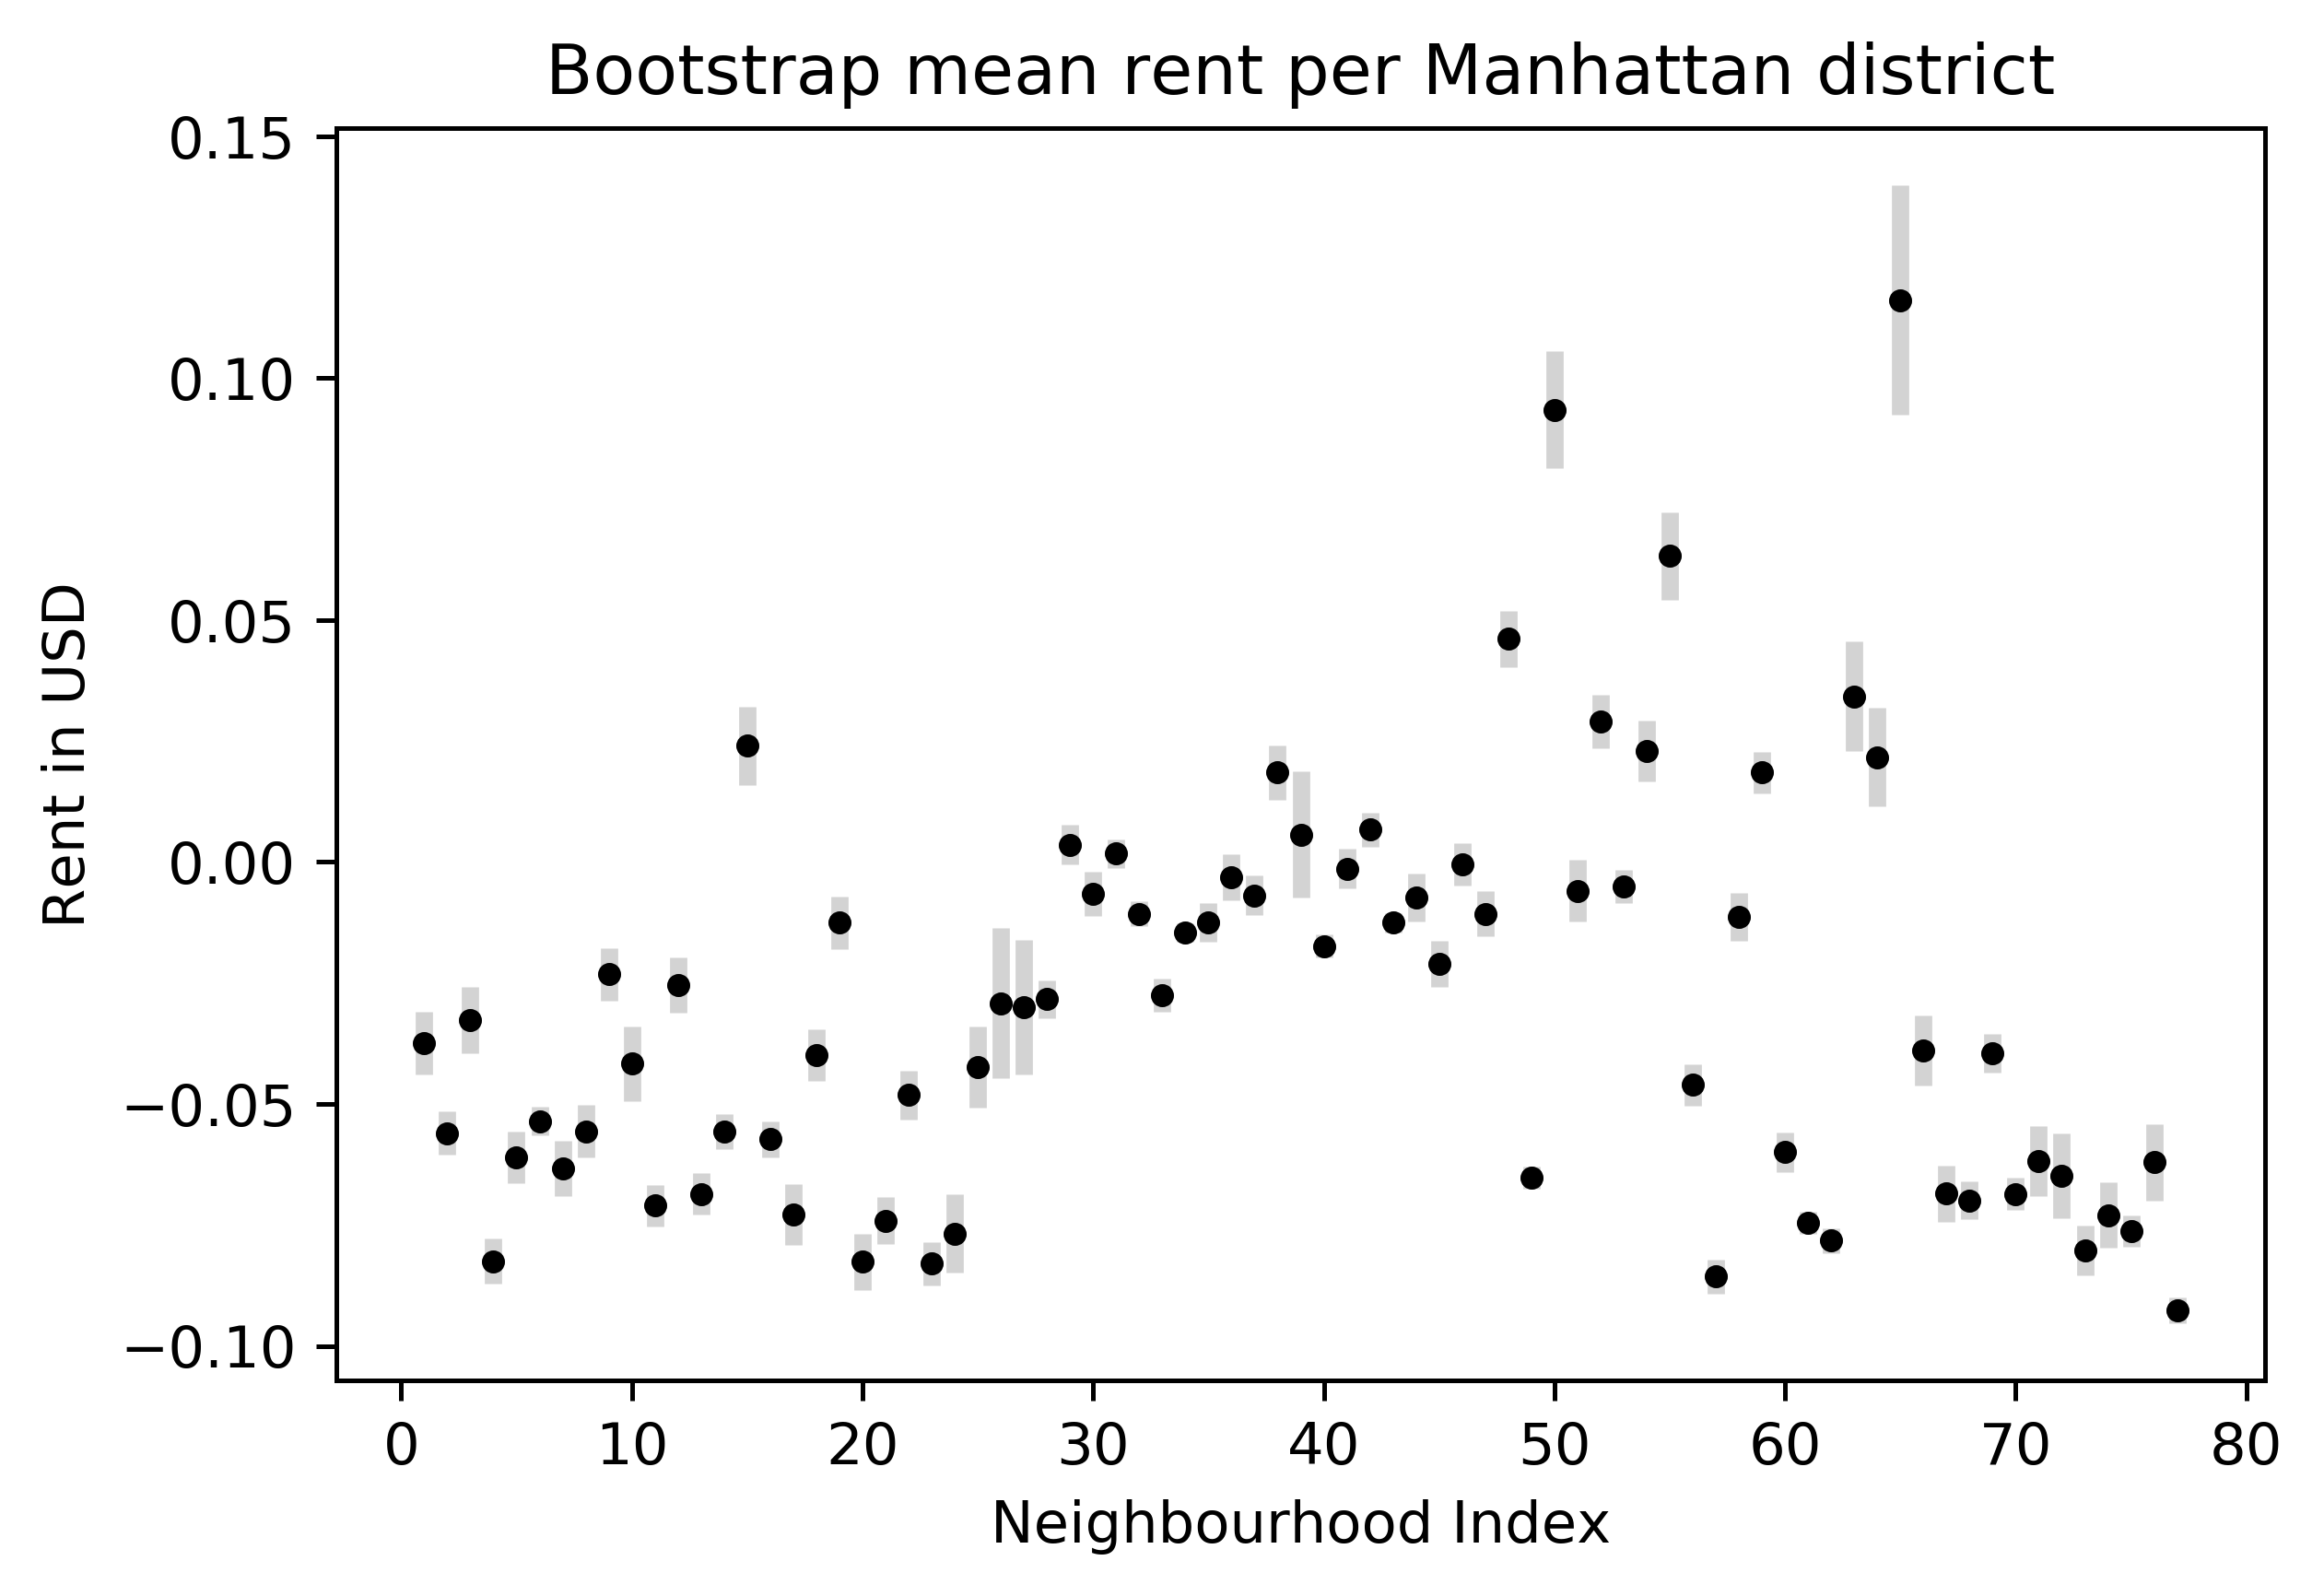

In [33]:
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

sample_mean = np.mean(y, axis = 1)
sample_error = np.std(y, axis = 1)

plt.errorbar(
    x = range(1, bootstraps.shape[0] + 1),
    y = sample_mean,
    yerr= 1.96 * sample_error,
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Bootstrap mean rent per Manhattan district')
plt.ylabel('Rent in USD')
plt.xlabel('Neighbourhood Index')
# plt.xticks(range(1, bootstraps.shape[0] + 1))
plt.show()

In [34]:
X_sets.shape

(77, 25, 10)

### GCN 

In [35]:
import torch
print('Torch version:', torch.__version__)
import torch.nn as nn
import torch.nn.functional as F
import scipy.sparse as sp

# import dgl
# from dgl.nn.pytorch import GraphConv
# import networkx as nx

Torch version: 1.5.1


In [36]:
# features = np.mean(y, axis = 1)
features = np.reshape(X_sets,(X_sets.shape[0], -1))
features = np.array(features, dtype='float')
# labels = mean
labels = np.array(mean, dtype = 'float')

# idx_train = list(np.array([1, 6, 7, 12]) - 1)
# idx_val = list(np.array([3, 5, 8, 10])  - 1)
# idx_test = list(np.array([2, 4, 9, 11])  - 1)

# produce a split for training, validation and testing
indices = np.arange(0, mean.shape[0]) # number of rows
np.random.shuffle(indices)
idx_train = indices[:59]
idx_val = indices[60:69]
idx_test = indices[70:]


# train_labels = [mean[i] for i in index_train]
# val_labels = [mean[i] for i in index_val]
# test_labels = [mean[i] for i in index_test]

adj = np.loadtxt('adj_nbhd.txt', dtype='float', delimiter=',')

# test = adj
# D = np.diag(np.power(np.sum(adj, axis = 1), -1))
# adj = np.dot(adj, D)

# adj = csr_matrix(adj)

# G = dgl.DGLGraph()
# adj_nx = nx.from_numpy_matrix(adj)
# G = dgl.from_networkx(adj_nx)

# print(features.shape)
# # print(features.T)

def normalize(mx):
    """Row-normalize sparse matrix"""
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx

adj = normalize(adj)
print(adj.shape)

(77, 77)


In [37]:
import math
import torch
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
import time


class GraphConvolution(Module):
    """
    Simple GCN layer, similar to https://arxiv.org/abs/1609.02907
    """

    def __init__(self, in_features, out_features, bias=True):
        super(GraphConvolution, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))
        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, adj):
        support = torch.mm(input, self.weight)
        output = torch.spmm(adj, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output

    def __repr__(self):
        return self.__class__.__name__ + ' (' \
               + str(self.in_features) + ' -> ' \
               + str(self.out_features) + ')'


class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
#     def __init__(self, nfeat, nclass, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nclass)
#         self.gc1 = GraphConvolution(nfeat, nclass)

        self.dropout = dropout

    def forward(self, x, adj):
        x = F.relu(self.gc1(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        return x
    
# def accuracy(output, labels):
#     preds = output.max(1)[1].type_as(labels)
#     correct = preds.eq(labels).double()
#     correct = correct.sum()
#     return correct / len(labels)

In [38]:
EPOCHS = 5000

# Model and optimizer
model = GCN(nfeat=features.shape[1],nhid=16,nclass=1,dropout=0.4)
# model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.01)
mse = nn.MSELoss()

features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)


def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    loss_train = mse(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    if((epoch + 1) % 1000 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output = model(features, adj)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

D:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([59])) that is different to the input size (torch.Size([59, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
D:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1000 loss_train: 1.1571 loss_val: 1.0258 time: 0.0010s
Epoch: 2000 loss_train: 0.4756 loss_val: 0.0917 time: 0.0010s
Epoch: 3000 loss_train: 0.0934 loss_val: 0.0610 time: 0.0010s
Epoch: 4000 loss_train: 0.0266 loss_val: 0.0321 time: 0.0010s
Epoch: 5000 loss_train: 0.0272 loss_val: 0.0257 time: 0.0010s
Optimization Finished!
Total time elapsed: 4.5386s


D:\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Test set results: loss= 0.0018


In [39]:
output = model(features, adj)

In [40]:
print(torch.mean(torch.abs(output.T-labels)))
mse(output[idx_test], labels[idx_test]) # print standardized MSE of model

tensor(0.0457, grad_fn=<MeanBackward0>)


tensor(0.0018, grad_fn=<MseLossBackward>)

In [41]:
np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy())

0.042771026

In [42]:
clone = pd.read_csv('neighbourhood_data.csv')['price']

In [43]:
print('RMSE of model in USD:', clone.std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

RMSE of model in USD: 945.0984204538154


### GAT

In [44]:
class GraphAttentionLayer(nn.Module):
    """
    Simple GAT layer, similar to https://arxiv.org/abs/1710.10903
    """
    def __init__(self, in_features, out_features, dropout, alpha, concat=True):
        super(GraphAttentionLayer, self).__init__()
        self.dropout = dropout
        self.in_features = in_features
        self.out_features = out_features
        self.alpha = alpha
        self.concat = concat

        self.W = nn.Parameter(torch.empty(size=(in_features, out_features)))
        nn.init.xavier_uniform_(self.W.data, gain=1.414)
        self.a = nn.Parameter(torch.empty(size=(2*out_features, 1)))
        nn.init.xavier_uniform_(self.a.data, gain=1.414)

        self.leakyrelu = nn.LeakyReLU(self.alpha)

    def forward(self, h, adj):
        Wh = torch.mm(h, self.W) # h.shape: (N, in_features), Wh.shape: (N, out_features)
        a_input = self._prepare_attentional_mechanism_input(Wh)
        e = self.leakyrelu(torch.matmul(a_input, self.a).squeeze(2))

        zero_vec = -9e15*torch.ones_like(e)
        attention = torch.where(adj > 0, e, zero_vec)
        attention = F.softmax(attention, dim=1)
        attention = F.dropout(attention, self.dropout, training=self.training)
        h_prime = torch.matmul(attention, Wh)

        if self.concat:
            return F.elu(h_prime)
        else:
            return h_prime

    def _prepare_attentional_mechanism_input(self, Wh):
        N = Wh.size()[0] # number of nodes

        # Below, two matrices are created that contain embeddings in their rows in different orders.
        # (e stands for embedding)
        # These are the rows of the first matrix (Wh_repeated_in_chunks): 
        # e1, e1, ..., e1,            e2, e2, ..., e2,            ..., eN, eN, ..., eN
        # '-------------' -> N times  '-------------' -> N times       '-------------' -> N times
        # 
        # These are the rows of the second matrix (Wh_repeated_alternating): 
        # e1, e2, ..., eN, e1, e2, ..., eN, ..., e1, e2, ..., eN 
        # '----------------------------------------------------' -> N times
        # 
        
        Wh_repeated_in_chunks = Wh.repeat_interleave(N, dim=0)
        Wh_repeated_alternating = Wh.repeat(N, 1)
        # Wh_repeated_in_chunks.shape == Wh_repeated_alternating.shape == (N * N, out_features)

        # The all_combination_matrix, created below, will look like this (|| denotes concatenation):
        # e1 || e1
        # e1 || e2
        # e1 || e3
        # ...
        # e1 || eN
        # e2 || e1
        # e2 || e2
        # e2 || e3
        # ...
        # e2 || eN
        # ...
        # eN || e1
        # eN || e2
        # eN || e3
        # ...
        # eN || eN

        all_combinations_matrix = torch.cat([Wh_repeated_in_chunks, Wh_repeated_alternating], dim=1)
        # all_combinations_matrix.shape == (N * N, 2 * out_features)

        return all_combinations_matrix.view(N, N, 2 * self.out_features)

    def __repr__(self):
        return self.__class__.__name__ + ' (' + str(self.in_features) + ' -> ' + str(self.out_features) + ')'


class GAT(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout, alpha, nheads):
        """Dense version of GAT."""
        super(GAT, self).__init__()
        self.dropout = dropout

        self.attentions = [GraphAttentionLayer(nfeat, nhid, dropout=dropout, alpha=alpha, concat=True) for _ in range(nheads)]
        for i, attention in enumerate(self.attentions):
            self.add_module('attention_{}'.format(i), attention)

        self.out_att = GraphAttentionLayer(nhid * nheads, nclass, dropout=dropout, alpha=alpha, concat=False)

    def forward(self, x, adj):
        x = F.dropout(x, self.dropout, training=self.training)
        x = torch.cat([att(x, adj) for att in self.attentions], dim=1)
        x = F.dropout(x, self.dropout, training=self.training)
        x = F.elu(self.out_att(x, adj))
        return F.log_softmax(x, dim=1)

In [45]:
EPOCHS = 5000

# Model and optimizer
model = GAT(nfeat=features.shape[1],nhid=16,nclass=1,dropout=0.4,alpha=0.1,nheads=2)
# model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.01)
mse = nn.MSELoss()

features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)


def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    loss_train = mse(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    if((epoch + 1) % 1000 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output = model(features, adj)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

Epoch: 1000 loss_train: 0.0025 loss_val: 0.0028 time: 0.0070s
Epoch: 2000 loss_train: 0.0025 loss_val: 0.0028 time: 0.0080s
Epoch: 3000 loss_train: 0.0025 loss_val: 0.0028 time: 0.0080s
Epoch: 4000 loss_train: 0.0025 loss_val: 0.0028 time: 0.0090s
Epoch: 5000 loss_train: 0.0025 loss_val: 0.0028 time: 0.0100s
Optimization Finished!
Total time elapsed: 41.8490s
Test set results: loss= 0.0024


In [46]:
output = model(features, adj)

In [47]:
print(torch.mean(torch.abs(output.T-labels)))
mse(output[idx_test], labels[idx_test]) # print standardized MSE of model

tensor(0.0414, grad_fn=<MeanBackward0>)


tensor(0.0024, grad_fn=<MseLossBackward>)

In [48]:
print('RMSE of model in USD:', clone.std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

RMSE of model in USD: 1086.9858352732178


### Pure Deep Sets

In [49]:
class DeepSet(nn.Module):

    def __init__(self, in_features=10, set_features=25):
        super(DeepSet, self).__init__()
        self.in_features = in_features
        self.out_features = set_features
        self.feature_extractor = nn.Sequential(
            nn.Linear(in_features, 15),
            nn.ELU(inplace=True),
            nn.Linear(15, 15),
            nn.ELU(inplace=True),
            nn.Linear(15, set_features)
        )

        self.regressor = nn.Sequential(
            nn.Linear(set_features, 15),
            nn.ELU(inplace=True),
            nn.Linear(15, 15),
            nn.ELU(inplace=True),
            nn.Linear(15, 5),
            nn.ELU(inplace=True),
            nn.Linear(5, 1),
        )
        
        self.add_module('0', self.feature_extractor)
        self.add_module('1', self.regressor)
        
        
    def reset_parameters(self):
        for module in self.children():
            reset_op = getattr(module, "reset_parameters", None)
            if callable(reset_op):
                reset_op()
            
    def forward(self, input):
        x = input
        x = self.feature_extractor(x)
        x = x.sum(dim=1)
        x = self.regressor(x)
        return x

    def __repr__(self):
        return self.__class__.__name__ + '(' \
            + 'Feature Exctractor=' + str(self.feature_extractor) \
            + '\n Set Feature' + str(self.regressor) + ')'

In [50]:
# from tensorboardX import SummaryWriter
from torch import optim
from tqdm import tqdm


EPOCHS = 100

model = DeepSet()
if torch.cuda.is_available():
    model.cuda()

optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)


mse = nn.MSELoss()
# mse = nn.L1Loss()

features = np.array(X_sets, dtype='float')
features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)


def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features)
    loss_train = mse(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    if((epoch + 1) % 10 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output = model(features)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

Epoch: 0010 loss_train: 0.0440 loss_val: 0.0417 time: 0.0050s
Epoch: 0020 loss_train: 0.0382 loss_val: 0.0370 time: 0.0040s
Epoch: 0030 loss_train: 0.0278 loss_val: 0.0277 time: 0.0030s
Epoch: 0040 loss_train: 0.0192 loss_val: 0.0186 time: 0.0040s
Epoch: 0050 loss_train: 0.0125 loss_val: 0.0122 time: 0.0040s
Epoch: 0060 loss_train: 0.0077 loss_val: 0.0074 time: 0.0040s
Epoch: 0070 loss_train: 0.0043 loss_val: 0.0038 time: 0.0040s
Epoch: 0080 loss_train: 0.0026 loss_val: 0.0021 time: 0.0040s
Epoch: 0090 loss_train: 0.0023 loss_val: 0.0021 time: 0.0040s
Epoch: 0100 loss_train: 0.0022 loss_val: 0.0021 time: 0.0030s
Optimization Finished!
Total time elapsed: 0.7510s
Test set results: loss= 0.0010


In [51]:
output = model(features)
print('RMSE of model in USD:', clone.std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

RMSE of model in USD: 695.3910613879787


### SetGCN (end to end trainable)

In [52]:
features.size()

torch.Size([77, 25, 10])

In [53]:
import math
import torch
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
import time

class GraphDeepSet(nn.Module):

    def __init__(self, in_features=10, set_features=25, nhid = 64, dropout = 0.3):
        super(GraphDeepSet, self).__init__()
        self.in_features = in_features
        self.out_features = set_features
        self.gc1 = GraphConvolution(nhid, nhid)
        self.gc2 = GraphConvolution(nhid, 1)
        self.dropout = dropout
        self.feature_extractor = nn.Sequential(
            nn.Linear(in_features, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, set_features)
        )

        self.regressor = nn.Sequential(
            nn.Linear(set_features, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, nhid),
            nn.ELU(inplace=True),
            nn.Linear(nhid, nhid),
        )
        
        self.add_module('0', self.feature_extractor)
        self.add_module('1', self.regressor)
        
        
    def reset_parameters(self):
        for module in self.children():
            reset_op = getattr(module, "reset_parameters", None)
            if callable(reset_op):
                reset_op()
            
    def forward(self, input, adj):
        x = input
        x = self.feature_extractor(x)
        x = x.sum(dim=1)
        x = self.regressor(x)
        x = self.gc1(x, adj)
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        return x

    def __repr__(self):
        return self.__class__.__name__ + '(' \
            + 'Feature Exctractor=' + str(self.feature_extractor) \
            + '\n Set Feature' + str(self.regressor) + ')'

In [54]:
EPOCHS = 1000

features = np.array(X_sets, dtype='float')
features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)

# Model and optimizer
model = GraphDeepSet()
# model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.0001)
mse = nn.MSELoss()


def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    loss_train = mse(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    if((epoch + 1) % 250 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output = model(features, adj)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

Epoch: 0250 loss_train: 0.1034 loss_val: 0.0765 time: 0.0050s
Epoch: 0500 loss_train: 0.0132 loss_val: 0.0058 time: 0.0040s
Epoch: 0750 loss_train: 0.0122 loss_val: 0.0118 time: 0.0040s
Epoch: 1000 loss_train: 0.0078 loss_val: 0.0051 time: 0.0040s
Optimization Finished!
Total time elapsed: 4.2726s
Test set results: loss= 0.0032


In [55]:
output = model(features, adj)

In [56]:
print('RMSE of model in USD:', clone.std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

RMSE of model in USD: 1256.9097941144478


### SetGAT

In [57]:
import math
import torch
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
import time

class GATDeepSet(nn.Module):

    def __init__(self, in_features=10, set_features=25, nhid = 64, dropout = 0.3):
        super(GATDeepSet, self).__init__()
        self.in_features = in_features
        self.out_features = set_features
        self.gc1 = GraphAttentionLayer(in_features=nhid, out_features=nhid, dropout=0.4, alpha=0.1, concat=True)
        self.gc2 = GraphAttentionLayer(in_features=nhid, out_features=1, dropout=0.4, alpha=0.1, concat=False)

        self.dropout = dropout
        self.feature_extractor = nn.Sequential(
            nn.Linear(in_features, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, set_features)
        )

        self.regressor = nn.Sequential(
            nn.Linear(set_features, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, 25),
            nn.ELU(inplace=True),
            nn.Linear(25, nhid),
            nn.ELU(inplace=True),
            nn.Linear(nhid, nhid),
        )
        
        self.add_module('0', self.feature_extractor)
        self.add_module('1', self.regressor)
        
        
    def reset_parameters(self):
        for module in self.children():
            reset_op = getattr(module, "reset_parameters", None)
            if callable(reset_op):
                reset_op()
            
    def forward(self, input, adj):
        x = input
        x = self.feature_extractor(x)
        x = x.sum(dim=1)
        x = self.regressor(x)
        x = self.gc1(x, adj)
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        return x

    def __repr__(self):
        return self.__class__.__name__ + '(' \
            + 'Feature Exctractor=' + str(self.feature_extractor) \
            + '\n Set Feature' + str(self.regressor) + ')'

In [58]:
EPOCHS = 1000

features = np.array(X_sets, dtype='float')
features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)

# Model and optimizer
model = GATDeepSet()
# model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.0001)
mse = nn.MSELoss()


def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    loss_train = mse(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    if((epoch + 1) % 250 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model.eval()
    output = model(features, adj)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

Epoch: 0250 loss_train: 0.1298 loss_val: 0.0407 time: 0.0110s
Epoch: 0500 loss_train: 0.0113 loss_val: 0.0101 time: 0.0120s
Epoch: 0750 loss_train: 0.0096 loss_val: 0.0084 time: 0.0110s
Epoch: 1000 loss_train: 0.0068 loss_val: 0.0036 time: 0.0120s
Optimization Finished!
Total time elapsed: 12.2811s
Test set results: loss= 0.0012


In [59]:
output = model(features, adj)

In [60]:
print('RMSE of model in USD:', clone.std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

RMSE of model in USD: 756.500362047826


### MLP

In [61]:
features = np.reshape(X_sets,(X_sets.shape[0], -1))
features = np.array(features, dtype='float')
features = torch.FloatTensor(features)
labels = torch.FloatTensor(mean)
adj = torch.FloatTensor(adj)
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)

class MLP(Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(features.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        output = x
        return output



EPOCHS = 1500

# Model and optimizer
model2 = MLP()
# model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3, weight_decay=0.001)
mse = nn.MSELoss()
# mse = nn.L1Loss()




def train(epoch):
    t = time.time()
    model2.train()
    optimizer.zero_grad()
    output = model2(features)
    loss_train = mse(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    loss_val = mse(output[idx_val], labels[idx_val])
    if((epoch + 1) % 500 == 0):
        print('Epoch: {:04d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(loss_train.item()),
              'loss_val: {:.4f}'.format(loss_val.item()),
              'time: {:.4f}s'.format(time.time() - t))


def test():
    model2.eval()
    output = model2(features)
    loss_test = mse(output[idx_test], labels[idx_test])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))


# Train model
t_total = time.time()
for epoch in range(EPOCHS):
    train(epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

# Testing
test()

Epoch: 0500 loss_train: 0.0018 loss_val: 0.4186 time: 0.0020s
Epoch: 1000 loss_train: 0.0018 loss_val: 0.4148 time: 0.0020s
Epoch: 1500 loss_train: 0.0018 loss_val: 0.4096 time: 0.0010s
Optimization Finished!
Total time elapsed: 1.7433s
Test set results: loss= 0.1334


In [62]:
output = model2(features)

In [63]:
print('RMSE of model in USD:', clone.std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

RMSE of model in USD: 8070.998234644041


In [64]:
non_standardized['price'] = non_standardized['price'].clip(upper = np.percentile(non_standardized['price'].values, 99))

In [65]:
non_standardized['price'].std()

1846.8701974544192

### Produce RMSE plots in USD for method versus baseline

In [ ]:
# num_test_per_sample = 10
# samples_num_list = [2,5,10,15,20,25,30,40,50]

num_test_per_sample = 7
# num_test_per_sample = 1

samples_num_list = [25]

EPOCHS_DS = 30
EPOCHS_GAT = 3
EPOCHS_GCN = 2500
EPOCHS_MLP = 1500
EPOCHS_SGCN = 7000
EPOCHS_SGAT = 1000


# EPOCHS_DS = 30
# EPOCHS_GAT = 3
# EPOCHS_GCN = 25
# EPOCHS_MLP = 15
# EPOCHS_SGCN = 7
# EPOCHS_SGAT = 10


max_iter_list = [EPOCHS_MLP, EPOCHS_GCN, EPOCHS_GAT, EPOCHS_DS, EPOCHS_SGCN, EPOCHS_SGAT]
models = [MLP(),
          GCN(nfeat=features.shape[1],nhid=4,nclass=1,dropout=0.1),
          GAT(nfeat=features.shape[1],nhid=4,nclass=1,dropout=0.1,alpha=0.1,nheads=1),
          DeepSet(),
          GraphDeepSet(),
          GATDeepSet()]

def trials():
    indices = np.arange(0, mean.shape[0]) # number of rows
    np.random.shuffle(indices)
    idx_train = indices[:55]
#     idx_val = indices[60:69]
    idx_test = indices[56:]
    mserr = []
    maerr = []
    mperr = []
    adj = np.loadtxt('adj_nbhd.txt', dtype='float', delimiter=',')
    adj = normalize(adj)
    
    
    def train(epoch, model):
        t = time.time()
        model.train()
        optimizer.zero_grad()
        if isinstance(model, MLP) or isinstance(model, DeepSet):
            output = model(features)
        else:
            output = model(features, adj)
        loss_train = mse(output[idx_train], labels[idx_train])
        loss_train.backward()
        optimizer.step()
#         loss_val = mse(output[idx_val], labels[idx_val])

    X = train_Set(n = 25)
    X_train = X
    y_train = y

#         for sample in samples_num_list:
    for network, max_iter in zip(models, max_iter_list):
        for i in range(num_test_per_sample):

#     for i in range(num_test_per_sample):
#         for network, max_iter in zip(models, max_iter_list):



            # Model and optimizer
            model = network
            optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.1)
            mse = nn.MSELoss()
            mae = nn.L1Loss()
            
            
            

            features = np.array(X_train, dtype='float')

            if isinstance(model, MLP) or isinstance(model, GCN) or isinstance(model, GAT):
                features = np.reshape(features,(features.shape[0], -1))
            else:
                features = np.array(X_train, dtype='float')
                
            features = torch.FloatTensor(features)
            labels = torch.FloatTensor(mean)
            adj = torch.FloatTensor(adj)
            idx_train = torch.LongTensor(idx_train)
#                 idx_val = torch.LongTensor(idx_val)
            idx_test = torch.LongTensor(idx_test)

            # Train model
            t_total = time.time()
            for epoch in range(max_iter):
                train(epoch, model)

            if isinstance(model, MLP) or isinstance(model, DeepSet):
                output = model(features)
            else:
                output = model(features, adj)

            mserr.append(non_standardized['price'].std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))
            maerr.append(non_standardized['price'].std() * np.sqrt(mae(output[idx_test], labels[idx_test]).detach().numpy()))
#             mperr.append(np.mean(np.abs(((output[idx_test] - labels[idx_test])/labels[idx_test]).detach().numpy())))
            mperr.append(np.mean(torch.abs((labels[idx_test] - output[idx_test].T) / labels[idx_test]).detach().numpy()) / non_standardized['price'].std() * 100)
    
#     with open('test_log.csv', 'a') as f:
#         writer = csv.writer(f)
#         writer.writerow(str(mserr))
            
    return mserr, maerr, mperr

results, maerr, mperr = trials()

In [ ]:
mae = nn.L1Loss()
(mae(output[idx_test], labels[idx_test]) / torch.abs(labels[idx_test])).detach().numpy()

In [ ]:
model_errors = np.array(results).reshape(len(models),num_test_per_sample)
# np.save('model_errors.npy', model_errors)
model_means = np.mean(model_errors, axis = 1)
model_std = np.std(model_errors, axis = 1)

In [ ]:
print(model_means)
print(model_std)

In [ ]:
maerr_errors = np.array(maerr).reshape(len(models),num_test_per_sample)
# np.save('maerr_errors.npy', model_errors)
maerr_means = np.mean(maerr_errors, axis = 1)
maerr_std = np.std(maerr_errors, axis = 1)
print(maerr_means)
print(maerr_std)

In [ ]:
mperr_errors = np.array(mperr).reshape(len(models),num_test_per_sample)
# np.save('mperr_errors.npy', model_errors)
mperr_means = np.mean(mperr_errors, axis = 1)
mperr_std = np.std(mperr_errors, axis = 1)
print(mperr_means)
print(mperr_std)

In [ ]:
# Define labels, positions, bar heights and error bar heights
labels = ['MLP', 'GCN', 'GAT', 'Deep Sets', 'SGCN', 'SGAT']
x_pos = np.arange(len(labels))
mean = model_means
error = model_std

fig, ax = plt.subplots()
ax.bar(x_pos, mean,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('RMSE in USD')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Mean Rental Price Prediction Model Comparison')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [ ]:
print(np.min(model_errors, axis = 1))
print(np.max(model_errors, axis = 1))

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
# fig, ax = plt.subplots(figsize=(12, 8))
fig, ax = plt.subplots()
# Define labels, positions, bar heights and error bar heights
labels = ['MLP', 'GCN', 'GAT', 'Deep Sets', 'SGCN', 'SGAT']
x_pos = np.arange(len(labels))
mean = model_means
lower_error = mean - np.min(model_errors, axis = 1)
upper_error = np.max(model_errors, axis = 1) - mean
asymmetric_error = [lower_error, upper_error]


ax.bar(x_pos, mean,
       yerr=asymmetric_error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('RMSE in USD')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Mean Rental Price Prediction Model Comparison')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.ylim(30, 200)
# plt.savefig('bar_plot_with_error_bars_asym.png')
plt.show()

In [ ]:
model_errors

In [76]:
# median = np.median(model_errors, axis = 1)
# upper_quartile = np.percentile(model_errors, 75, axis = 1)
# lower_quartile = np.percentile(model_errors, 25, axis = 1)

# iqr = upper_quartile - lower_quartile

# upper_whisker = np.max(model_errors, axis = 1)
# lower_whisker = np.min(model_errors, axis = 1)

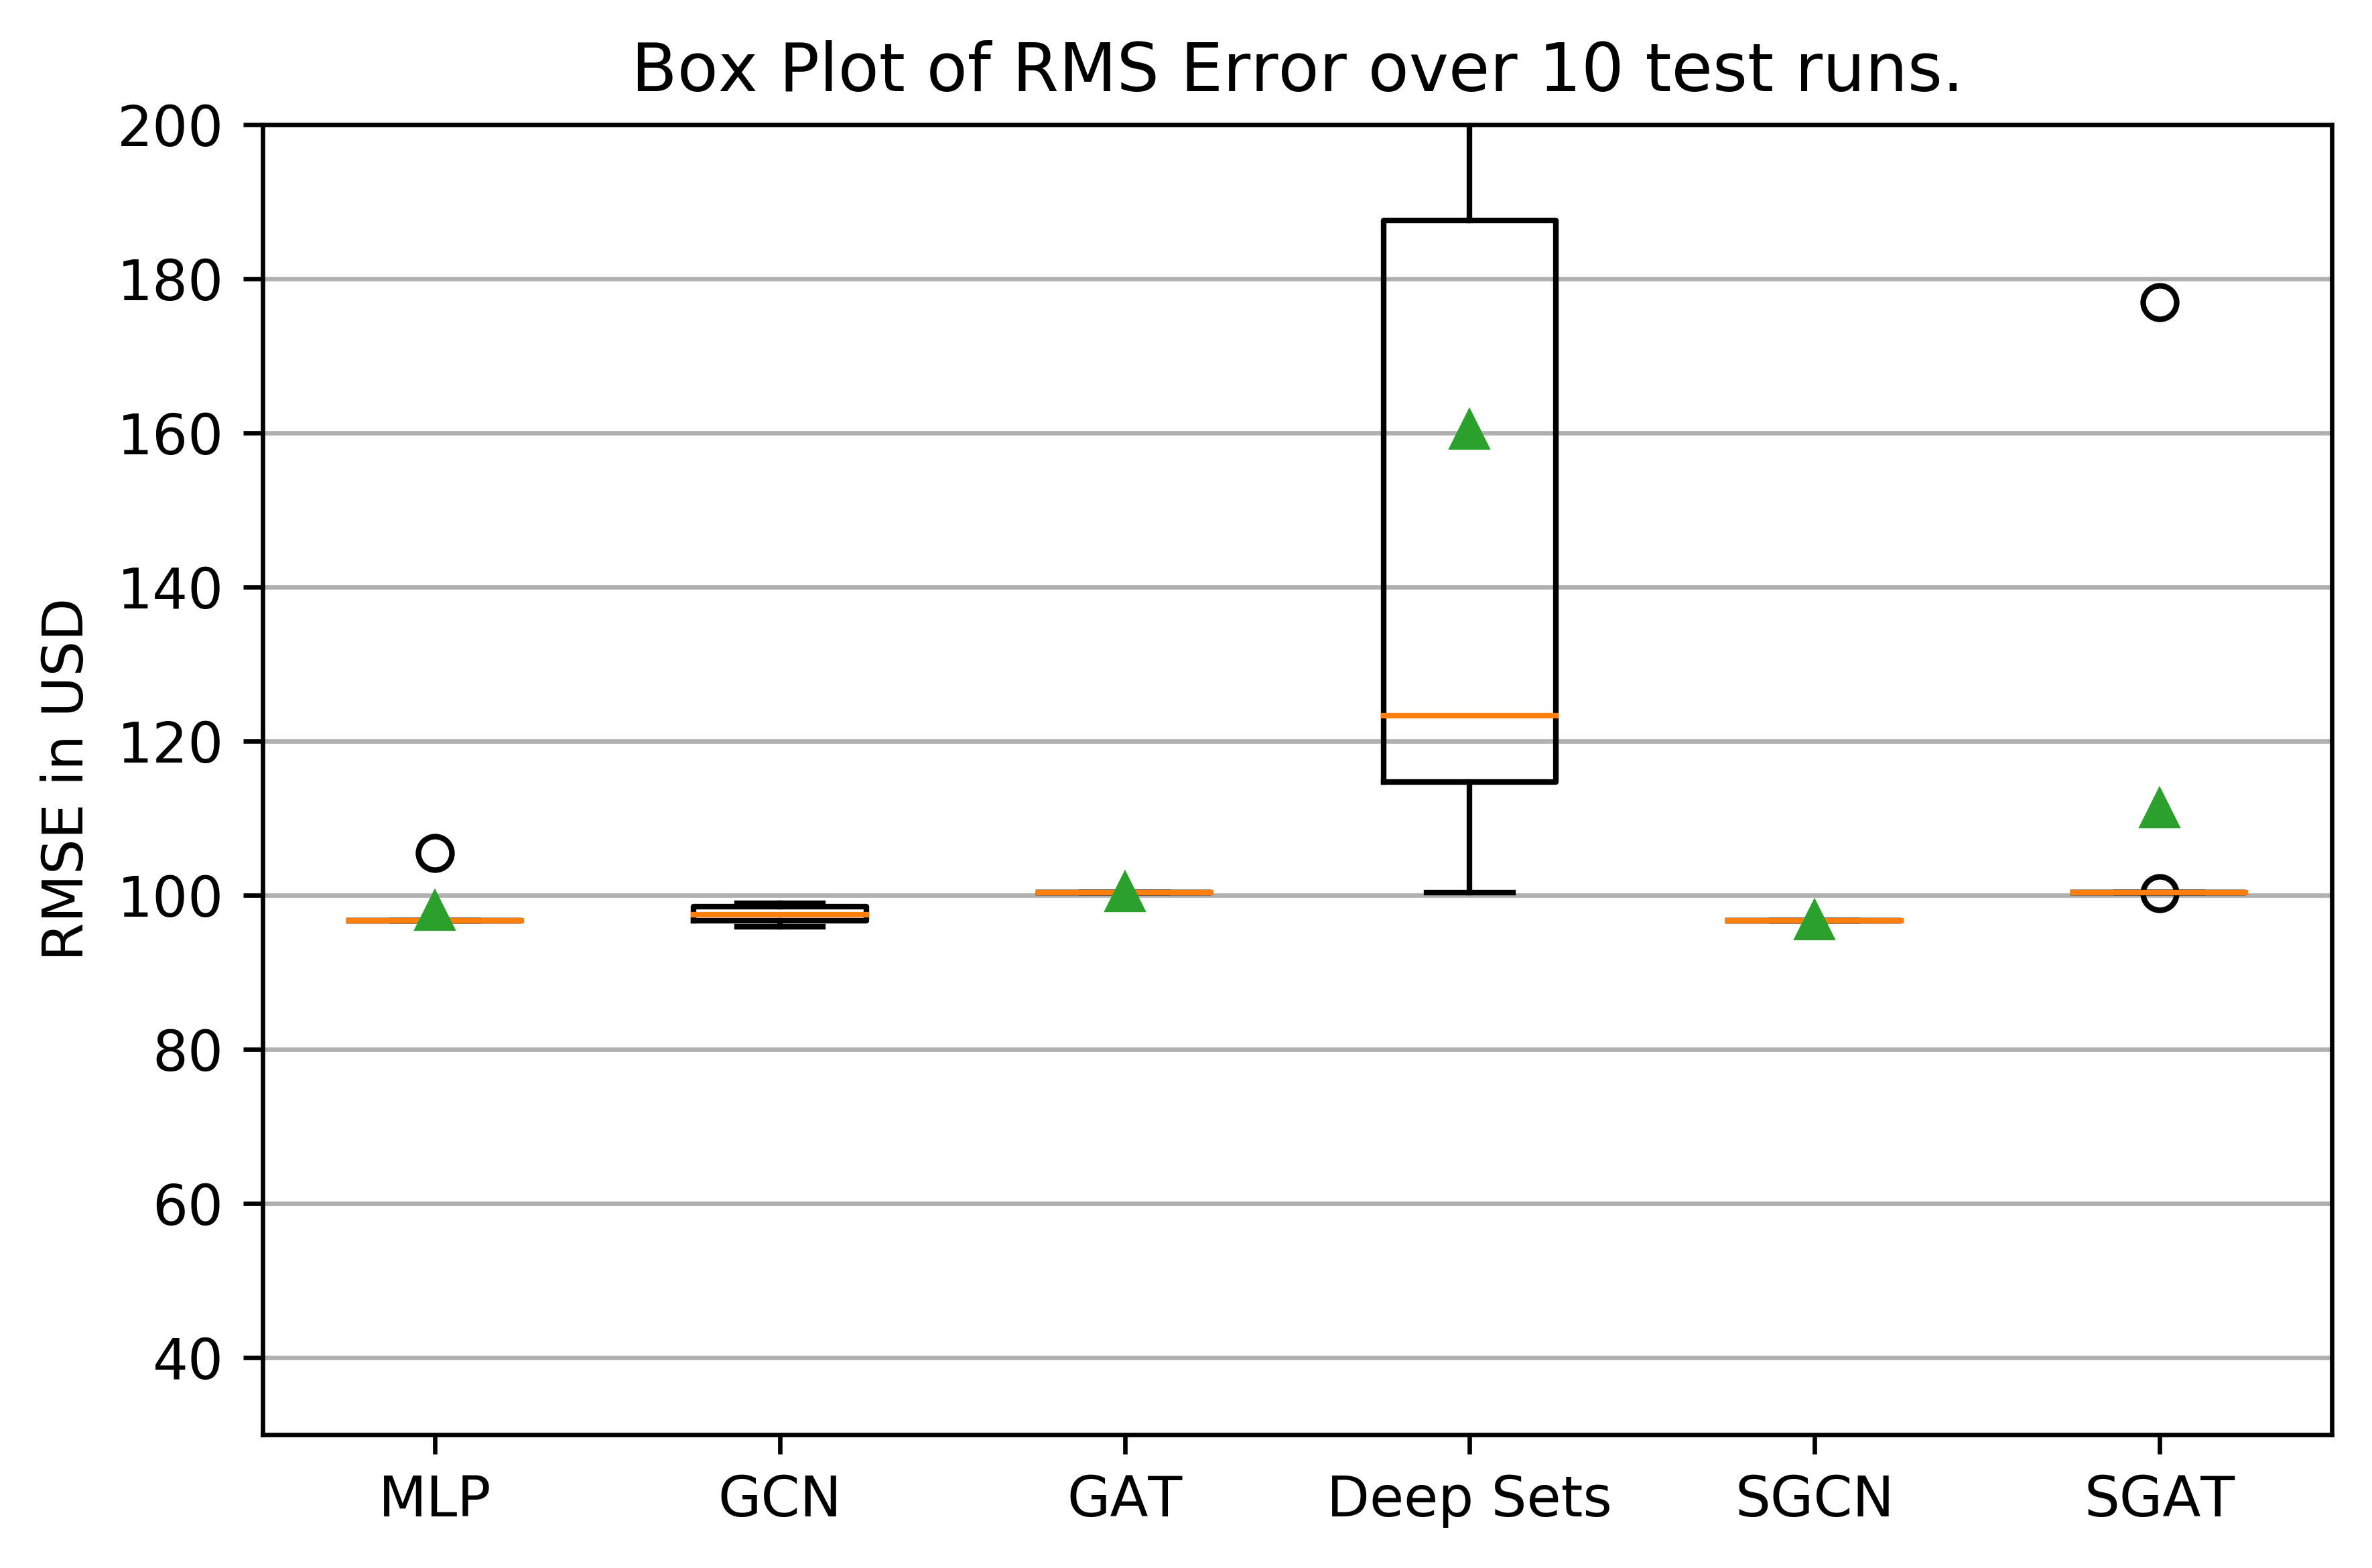

In [77]:
fig, ax = plt.subplots()
plt.boxplot([model_errors[0], model_errors[1], model_errors[2], model_errors[3], model_errors[4], model_errors[5]], bootstrap=None, whis = 10, showmeans = True, meanline = False)
labels = ['MLP', 'GCN', 'GAT', 'Deep Sets', 'SGCN', 'SGAT']
ax.set_ylabel('RMSE in USD')
ax.set_xticklabels(labels)
ax.set_title('Box Plot of RMS Error over 10 test runs.')
ax.yaxis.grid(True)
plt.ylim(30, 200)
plt.tight_layout()
# plt.savefig('boxplot.png')
plt.show()

In [78]:
# fig, ax = plt.subplots()
# #create markings that represent the ends of whiskers
# low=np.percentile(model_errors, 5, axis = 0)
# high=np.percentile(model_errors, 95, axis = 0)
# plt.scatter(range(1,len(low)+1),low,marker='_')
# plt.scatter(range(1,len(low)+1),high,marker='_')
# #connects low and high markers with a line
# plt.vlines(range(1,len(low)+1),low,high)
# plt.boxplot(model_errors,whis=0)
# plt.show()

In [79]:
# num_test_per_sample = 10
# samples_num_list = [2,5,10,15,20,25,30,40]


# def trials():
#     indices = np.arange(0, mean.shape[0]) # number of rows
#     np.random.shuffle(indices)
#     idx_train = indices[:59]
#     idx_val = indices[60:69]
#     idx_test = indices[70:]
#     results_model = []
#     results_baseline = []
#     adj = np.loadtxt('adj_nbhd.txt', dtype='float', delimiter=',')
#     adj = normalize(adj)
    
    
#     def train(epoch):
#         t = time.time()
#         model.train()
#         optimizer.zero_grad()
#         output = model(features, adj)
#         loss_train = mse(output[idx_train], labels[idx_train])
#         loss_train.backward()
#         optimizer.step()

#         loss_val = mse(output[idx_val], labels[idx_val])
# #         if((epoch + 1) % 1000 == 0):
# #             print('Epoch: {:04d}'.format(epoch+1),
# #                   'loss_train: {:.4f}'.format(loss_train.item()),
# #                   'loss_val: {:.4f}'.format(loss_val.item()),
# #                   'time: {:.4f}s'.format(time.time() - t))

#     def test():
#         model.eval()
#         output = model(features, adj)
#         loss_test = mse(output[idx_test], labels[idx_test])
# #         print("Test set results:",
# #               "loss= {:.4f}".format(loss_test.item()))
    
#     for sample in samples_num_list:
#         for i in range(num_test_per_sample):
#             X, y = trainSet(sample, 200)
#             X_train = X
#             y_train = y

#             features = np.mean(y, axis = 1)
#             features = np.reshape(features,(features.shape[0], -1))
#             features = np.array(features, dtype='float')
#             labels = np.array(mean, dtype = 'float')

#             EPOCHS = 5000

#             # Model and optimizer
#             model = GCN(nfeat=features.shape[1],nhid=16,nclass=1,dropout=0.4)
#             # model = GCN(nfeat=features.shape[1],nclass=1,dropout=0.2)
#             optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.01)
#             mse = nn.MSELoss()

#             features = torch.FloatTensor(features)
#             labels = torch.FloatTensor(mean)
#             adj = torch.FloatTensor(adj)
#             idx_train = torch.LongTensor(idx_train)
#             idx_val = torch.LongTensor(idx_val)
#             idx_test = torch.LongTensor(idx_test)

#             # Train model
#             t_total = time.time()
#             for epoch in range(EPOCHS):
#                 train(epoch)
                
#             output = model(features, adj)

#             results_model.append(non_standardized['price'].std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))
#             results_baseline.append(non_standardized['price'].std() * np.sqrt(mse(features[idx_test], labels[idx_test]).detach().numpy()))

#     return results_model, results_baseline

# model, baseline = trials()

In [80]:
# model_errors = np.array(model).reshape(len(samples_num_list),num_test_per_sample)
# baseline_errors = np.array(baseline).reshape(len(samples_num_list),num_test_per_sample)

# model_means = np.mean(model_errors, axis = 1)
# baseline_means = np.mean(baseline_errors, axis = 1)
# model_std = np.std(model_errors, axis = 1)
# baseline_std = np.std(baseline_errors, axis = 1)

In [81]:
# plt.figure(figsize=(8,6))
# plt.errorbar(samples_num_list, model_means, yerr=model_std, fmt='o', color='darkblue', ecolor='lightblue', elinewidth=3)
# plt.errorbar(samples_num_list, baseline_means, yerr=baseline_std, fmt='o', color='darkred', ecolor='salmon', elinewidth=3)
# plt.xticks(samples_num_list)
# plt.xlabel("Number of samples at each neighbourhood", fontsize=16)
# plt.ylabel("Root mean squared error in US$", fontsize=16)
# plt.legend(["Proposed Model", "Local Averaging"], fontsize=16)
# plt.title("RMSE of Rental Price Prediction", fontsize=18, fontweight='bold')
# # plt.savefig('experiment_1.png', dpi=450, facecolor='w', edgecolor='w')
# plt.show()

### Significance testing using pairwise t-test

In [82]:
stats.ttest_ind(model_errors[0,:],model_errors[4,:], equal_var = True)

Ttest_indResult(statistic=1.0018284308170442, pvalue=0.3362006000390141)

In [83]:
stats.ttest_ind(model_errors[1,:],model_errors[4,:], equal_var = True)

Ttest_indResult(statistic=1.0044569908833663, pvalue=0.3349835730604972)

In [84]:
stats.ttest_ind(model_errors[2,:],model_errors[4,:], equal_var = True)

Ttest_indResult(statistic=1396.8017637083756, pvalue=1.2211452394024784e-32)

In [85]:
stats.ttest_ind(model_errors[3,:],model_errors[4,:], equal_var = True)

Ttest_indResult(statistic=2.4093192516736988, pvalue=0.03295367316456498)

In [86]:
stats.ttest_ind(model_errors[5,:],model_errors[4,:], equal_var = True)

Ttest_indResult(statistic=1.3279760998998362, pvalue=0.20889227912731104)

### Significance testing using Nadeau and Bengio correction of dependent Student's t-test

In [118]:
# Python implementation of the Nadeau and Bengio correction of dependent Student's t-test
# using the equation stated in https://www.cs.waikato.ac.nz/~eibe/pubs/bouckaert_and_frank.pdf

from scipy.stats import t
from math import sqrt
from statistics import stdev

def corrected_dependent_ttest(data1, data2, n_training_folds, n_test_folds, alpha):
    n = len(data1)
    differences = [(data1[i]-data2[i]) for i in range(n)]
    sd = stdev(differences)
    divisor = 1 / n * sum(differences)
    test_training_ratio = n_test_folds / n_training_folds  
    denominator = sqrt(1 / n + test_training_ratio) * sd
    t_stat = divisor / denominator
    # degrees of freedom
    df = n - 1
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

In [88]:
corrected_dependent_ttest(model_errors[0,:],model_errors[4,:], 5, 1, 0.5)

(0.6468219428121482, 6, 6.919082007155017e-17, 0.541685265968118)

In [89]:
corrected_dependent_ttest(model_errors[1,:],model_errors[4,:], 5, 1, 0.5)

(0.6483755777087129, 6, 6.919082007155017e-17, 0.540746457084635)

In [90]:
corrected_dependent_ttest(model_errors[2,:],model_errors[4,:], 5, 1, 0.5)

(901.631661465947, 6, 6.919082007155017e-17, 0.0)

In [91]:
corrected_dependent_ttest(model_errors[3,:],model_errors[4,:], 5, 1, 0.5)

(1.5552430588728983, 6, 6.919082007155017e-17, 0.17088754879795465)

In [92]:
corrected_dependent_ttest(model_errors[5,:],model_errors[4,:], 5, 1, 0.5)

(0.8572267443614808, 6, 6.919082007155017e-17, 0.424230434237828)

In [93]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

samples = model_errors[0]

print(bs.bootstrap(samples, stat_func=bs_stats.mean))

ModuleNotFoundError: No module named 'bootstrapped'

In [126]:
size = features.shape[1]

In [312]:
import csv
num_test_per_sample = 1

EPOCHS_DS = 120
EPOCHS_GAT = 200
EPOCHS_GCN = 8000
EPOCHS_MLP = 2500
EPOCHS_SGCN = 3000
EPOCHS_SGAT = 1000


def get_performance_test():
    
    
    max_iter_list = [EPOCHS_MLP, EPOCHS_GCN, EPOCHS_GAT, EPOCHS_DS, EPOCHS_SGCN, EPOCHS_SGAT]
    models = [MLP(),
          GCN(nfeat=size,nhid=64,nclass=1,dropout=0.1),
          GAT(nfeat=size,nhid=32,nclass=1,dropout=0.1,alpha=0.1,nheads=1),
          DeepSet(),
          GraphDeepSet(),
          GATDeepSet()]
    
    indices = np.arange(0, mean.shape[0]) # number of rows
    np.random.shuffle(indices)
    idx_train = indices[:55]
    idx_test = indices[56:]
    mserr = []
    maerr = []
    mperr = []
    adj = np.loadtxt('adj_nbhd.txt', dtype='float', delimiter=',')
    adj = normalize(adj)


    def train(epoch, model):
        t = time.time()
        model.train()
        optimizer.zero_grad()
        if isinstance(model, MLP) or isinstance(model, DeepSet):
            output = model(features)
        else:
            output = model(features, adj)
        loss_train = mse(output[idx_train], labels[idx_train])
        loss_train.backward()
        optimizer.step()

    X = train_Set(n = 25)
    X_train = X
    y_train = y

    for network, max_iter in zip(models, max_iter_list):
        for i in range(num_test_per_sample):

            # Model and optimizer
            model = network
            optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.1)
            mse = nn.MSELoss()
            mae = nn.L1Loss()

            features = np.array(X_train, dtype='float')

            if isinstance(model, MLP) or isinstance(model, GCN) or isinstance(model, GAT):
                features = np.reshape(features,(features.shape[0], -1))
            else:
                features = np.array(X_train, dtype='float')

            features = torch.FloatTensor(features)
            labels = torch.FloatTensor(mean)
            adj = torch.FloatTensor(adj)
            idx_train = torch.LongTensor(idx_train)
            idx_test = torch.LongTensor(idx_test)

            # Train model
            t_total = time.time()
            for epoch in range(max_iter):
                train(epoch, model)

            if isinstance(model, MLP) or isinstance(model, DeepSet):
                output = model(features)
            else:
                output = model(features, adj)

            mserr.append(non_standardized['price'].std() * np.sqrt(mse(output[idx_test], labels[idx_test]).detach().numpy()))

    return mserr

In [319]:
x = []
for i in range(50):
    x.append(get_performance_test())

In [320]:
x = np.array(x)

In [321]:
df = pd.DataFrame(x, columns = ['MLP', 'GCN', 'GAT', 'DeepSet', 'SGCN', 'SGAT'])

In [322]:
df

,MLP,GCN,GAT,DeepSet,SGCN,SGAT
0,118.109692,67.254892,84.436043,87.173948,86.364845,95.533586
1,99.797620,99.129567,103.994175,183.592270,116.229078,138.023520
2,353.059391,98.658877,95.233929,76.185476,84.888556,74.799702
3,90.928283,169.414501,78.157741,88.461984,97.303615,155.213643
4,100.683850,94.867417,94.733090,83.525823,78.034263,78.302244
5,174.110147,975.544415,91.019045,115.399892,101.660133,85.086311
6,148.385735,156.029048,90.256886,139.029835,108.932008,97.203895
7,76.739196,77.585500,104.798661,165.166243,67.871042,77.718369
8,130.601459,367.407705,91.500744,71.541507,95.387555,88.745844
9,86.120842,11225.440989,97.401066,121.980067,91.826614,87.987634


In [323]:
df.mean(axis=0)

MLP        139.230129
GCN        571.066223
GAT         91.195967
DeepSet    122.047262
SGCN        83.936377
SGAT       102.011834
dtype: float64

In [324]:
df.std(axis=0)

MLP          67.270349
GCN        1657.544915
GAT           8.817355
DeepSet      58.622398
SGCN         13.461891
SGAT         28.850813
dtype: float64

In [325]:
corrected_dependent_ttest(x[:,0],x[:,4], 85, 15, 0.5)

(1.8151800360083004, 49, 6.671941392032297e-17, 0.07561894697532301)

In [326]:
corrected_dependent_ttest(x[:,1],x[:,4], 85, 15, 0.5)

(0.6636432081104459, 49, 6.671941392032297e-17, 0.5100292239906161)

In [327]:
corrected_dependent_ttest(x[:,2],x[:,4], 85, 15, 0.5)

(1.2632281992422103, 49, 6.671941392032297e-17, 0.21248496178259813)

In [328]:
corrected_dependent_ttest(x[:,3],x[:,4], 85, 15, 0.5)

(1.3763406243108387, 49, 6.671941392032297e-17, 0.1749736469856804)

In [329]:
corrected_dependent_ttest(x[:,5],x[:,4], 85, 15, 0.5)

(1.4136937138752845, 49, 6.671941392032297e-17, 0.16377386480568767)

In [330]:
stats.ttest_ind(x[:,0],x[:,4], equal_var = False)

Ttest_indResult(statistic=5.699161995202859, pvalue=5.451411562802414e-07)

In [331]:
stats.ttest_ind(x[:,1],x[:,4], equal_var = False)

Ttest_indResult(statistic=2.0780218685968657, pvalue=0.04296686639950382)

In [332]:
stats.ttest_ind(x[:,2],x[:,4], equal_var = False)

Ttest_indResult(statistic=3.1898764334970062, pvalue=0.001997637404473251)

In [333]:
stats.ttest_ind(x[:,3],x[:,4], equal_var = False)

Ttest_indResult(statistic=4.480343220253127, pvalue=3.89456932824539e-05)

In [334]:
stats.ttest_ind(x[:,5],x[:,4], equal_var = False)

Ttest_indResult(statistic=4.014604104540483, pvalue=0.00014859947008808022)

In [335]:
df.to_csv('test_log_3.csv', index = False)

In [336]:
df

,MLP,GCN,GAT,DeepSet,SGCN,SGAT
0,118.109692,67.254892,84.436043,87.173948,86.364845,95.533586
1,99.797620,99.129567,103.994175,183.592270,116.229078,138.023520
2,353.059391,98.658877,95.233929,76.185476,84.888556,74.799702
3,90.928283,169.414501,78.157741,88.461984,97.303615,155.213643
4,100.683850,94.867417,94.733090,83.525823,78.034263,78.302244
5,174.110147,975.544415,91.019045,115.399892,101.660133,85.086311
6,148.385735,156.029048,90.256886,139.029835,108.932008,97.203895
7,76.739196,77.585500,104.798661,165.166243,67.871042,77.718369
8,130.601459,367.407705,91.500744,71.541507,95.387555,88.745844
9,86.120842,11225.440989,97.401066,121.980067,91.826614,87.987634
